In [1]:
raw_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/interim/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
import glob

In [4]:
ClassIII_rep_ppm = pd.read_csv(processed_dat_dir+'ClassIII_rep_ppm.csv')
ClassIII_rep_mgm3 = pd.read_csv(processed_dat_dir+'ClassIII_rep_mgm3.csv')

ClassII_rep_ppm = pd.read_csv(processed_dat_dir+'ClassII_rep_ppm.csv')
ClassII_rep_mgm3 = pd.read_csv(processed_dat_dir+'ClassII_rep_mgm3.csv')

ClassI_rep_ppm = pd.read_csv(processed_dat_dir+'ClassI_rep_ppm.csv')
ClassI_rep_mgm3 = pd.read_csv(processed_dat_dir+'ClassI_rep_mgm3.csv')

In [48]:
print(ClassI_rep_mgm3.shape)
print(ClassII_rep_mgm3.shape)
print(ClassIII_rep_mgm3.shape)
print(ClassI_rep_ppm.shape)
print(ClassII_rep_ppm.shape)
print(ClassIII_rep_ppm.shape)



(244, 4)
(14, 4)
(261, 4)
(244, 3)
(14, 3)
(261, 3)


### Looking at the distribution of the ToxVal ClassI data in mgm3 units

(array([225.,  11.,   3.,   1.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([5.69557517e-03, 3.81532983e+03, 7.63065397e+03, 1.14459781e+04,
        1.52613022e+04, 1.90766264e+04, 2.28919505e+04, 2.67072746e+04,
        3.05225988e+04, 3.43379229e+04, 3.81532471e+04]),
 <a list of 10 Patch objects>)

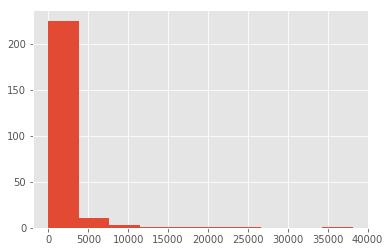

In [6]:
plt.style.use('ggplot')
plt.hist(ClassI_rep_mgm3['min_toxval_mgm3_adj'])

In [8]:
ClassI_rep_mgm3.describe()

ClassI_rep_mgm3['log_min_toxval_mgm3_adj'] = np.log10(ClassI_rep_mgm3['min_toxval_mgm3_adj'])

### Converting to Log and viewing distribution

(array([ 6., 18., 17., 13., 31., 44., 43., 36., 28.,  8.]),
 array([-2.24446241, -1.56186302, -0.87926363, -0.19666424,  0.48593515,
         1.16853455,  1.85113394,  2.53373333,  3.21633272,  3.89893211,
         4.5815315 ]),
 <a list of 10 Patch objects>)

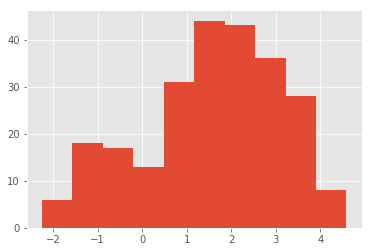

In [9]:

plt.hist(ClassI_rep_mgm3['log_min_toxval_mgm3_adj'])

In [15]:
ClassI_rep_mgm3[ClassI_rep_mgm3['DTXSID'] == 'DTXSID0020498']

,Unnamed: 0,DTXSID,min_toxval_mgm3_adj,log_min_toxval_mgm3_adj
0,0,DTXSID0020498,1.0,0.0


In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

### CDF of log toxval mgmg3 data 

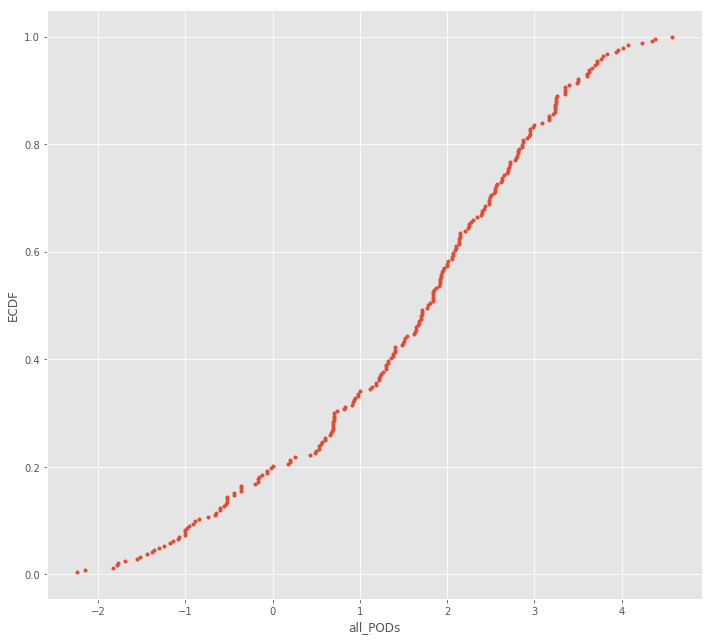

In [11]:
all_logPODs = ClassI_rep_mgm3['log_min_toxval_mgm3_adj']
x_all, y_all = ecdf(all_logPODs)
plt.figure(figsize = (10,9))
plt.plot(x_all, y_all , marker = '.', linestyle = 'none')
plt.xlabel('all_PODs')
plt.ylabel('ECDF')

plt.tight_layout()

### 5th percentile

In [12]:
print(10**(np.percentile(all_logPODs, 5)))


0.05789992361138339


### Checking normality assumptions

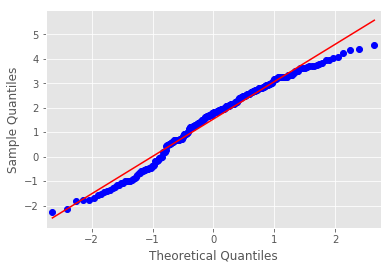

In [78]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(all_logPODs, line='s')
plt.savefig(figures_dir+'qqplt_ClassI.png', dpi = 300)

In [18]:
from scipy.stats import shapiro
stat, p = shapiro(all_logPODs)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.971, p=0.000
Sample does not look Gaussian (reject H0)


### Compare with Mark's data for Class I

In [20]:
mark = pd.read_csv(raw_dat_dir+'Class.I.min.csv')

(array([202.,  11.,   4.,   3.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([5.69557517e-03, 3.81532983e+03, 7.63065397e+03, 1.14459781e+04,
        1.52613022e+04, 1.90766264e+04, 2.28919505e+04, 2.67072746e+04,
        3.05225988e+04, 3.43379229e+04, 3.81532471e+04]),
 <a list of 10 Patch objects>)

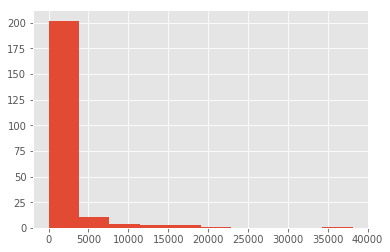

In [22]:
plt.hist(mark['toxval_mgm3'])

(array([ 4., 14., 12., 13., 24., 45., 40., 35., 26., 12.]),
 array([-2.24446241, -1.56186302, -0.87926363, -0.19666424,  0.48593515,
         1.16853455,  1.85113394,  2.53373333,  3.21633272,  3.89893211,
         4.5815315 ]),
 <a list of 10 Patch objects>)

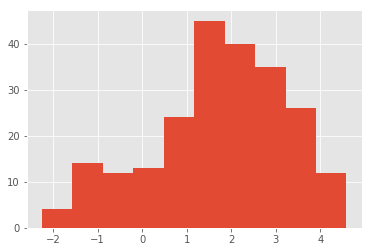

In [24]:
mark['log_toxval_mgm3'] = np.log10(mark['toxval_mgm3'])
plt.hist(mark['log_toxval_mgm3'])

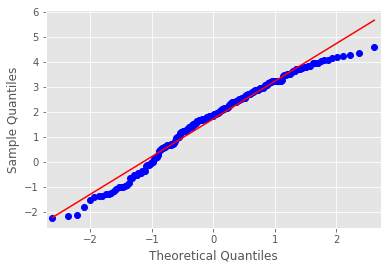

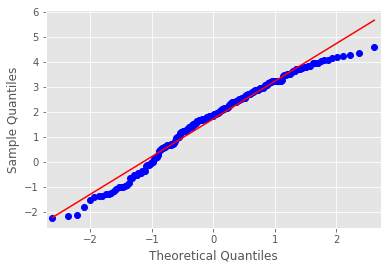

In [25]:
qqplot(mark['log_toxval_mgm3'], line='s')

In [26]:
stat, p = shapiro(mark['log_toxval_mgm3'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.969, p=0.000
Sample does not look Gaussian (reject H0)


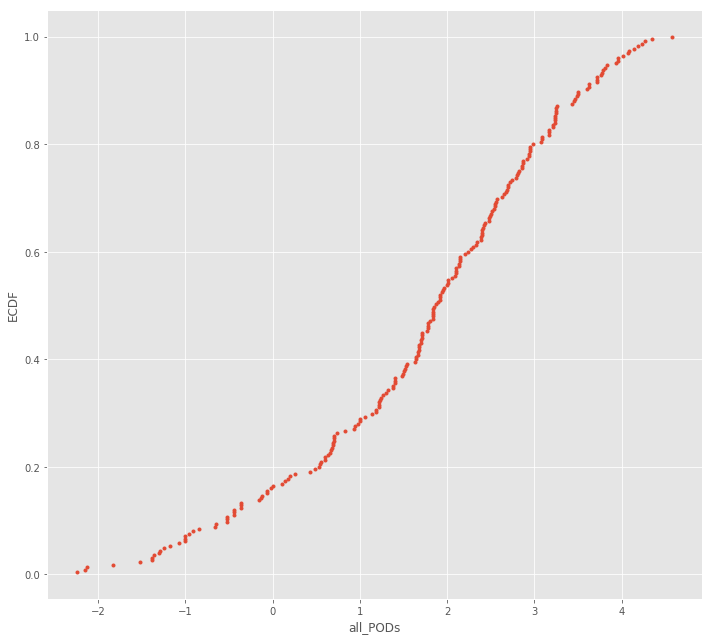

In [27]:

x_all, y_all = ecdf(mark['log_toxval_mgm3'])
plt.figure(figsize = (10,9))
plt.plot(x_all, y_all , marker = '.', linestyle = 'none')
plt.xlabel('all_PODs')
plt.ylabel('ECDF')

plt.tight_layout()

In [28]:
print(10**(np.percentile(mark['log_toxval_mgm3'], 5)))

0.07017058984469597


### Class III

In [30]:
ClassIII_rep_mgm3['log_min_toxval_mgm3_adj'] = np.log10(ClassIII_rep_mgm3['min_toxval_mgm3_adj'])

(array([ 5.,  8., 17., 33., 43., 74., 46., 19., 10.,  6.]),
 array([-3.30103   , -2.41681385, -1.5325977 , -0.64838155,  0.2358346 ,
         1.12005075,  2.0042669 ,  2.88848305,  3.7726992 ,  4.65691535,
         5.5411315 ]),
 <a list of 10 Patch objects>)

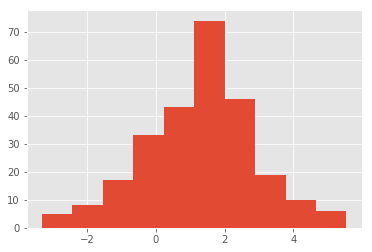

In [31]:
plt.hist(ClassIII_rep_mgm3['log_min_toxval_mgm3_adj'] )

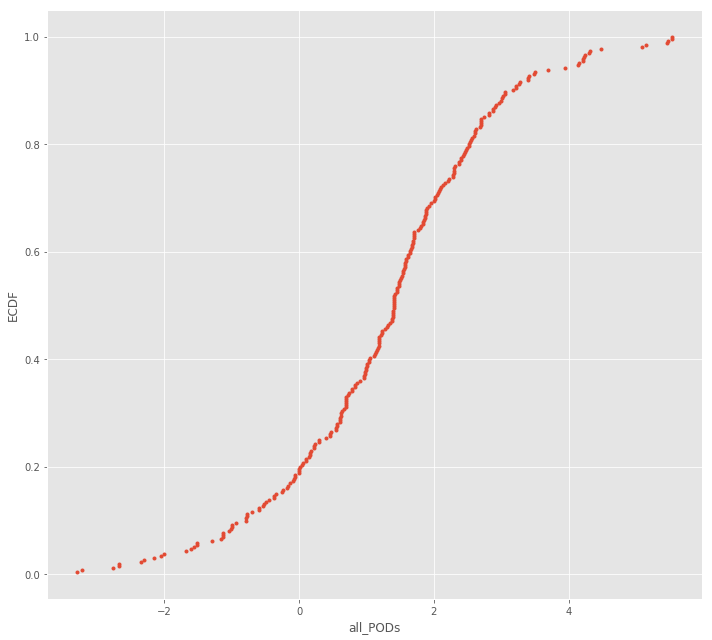

In [32]:

x_all, y_all = ecdf(ClassIII_rep_mgm3['log_min_toxval_mgm3_adj'])
plt.figure(figsize = (10,9))
plt.plot(x_all, y_all , marker = '.', linestyle = 'none')
plt.xlabel('all_PODs')
plt.ylabel('ECDF')

plt.tight_layout()

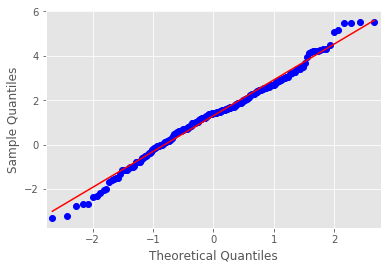

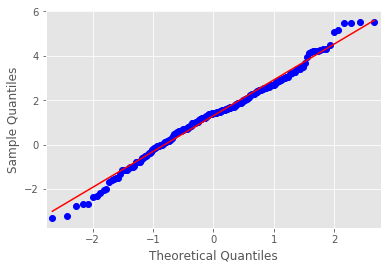

In [33]:
qqplot(ClassIII_rep_mgm3['log_min_toxval_mgm3_adj'], line='s')

In [37]:
stat, p = shapiro(ClassIII_rep_mgm3['log_min_toxval_mgm3_adj'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.988, p=0.030
Sample does not look Gaussian (reject H0)


In [36]:
print(10**(np.percentile(ClassIII_rep_mgm3['log_min_toxval_mgm3_adj'],5)))

0.029999999999999995


In [38]:
ClassIII_rep_mgm3['log_min_toxval_mgm3_adj'].shape

(261,)

In [41]:
ClassII_rep_mgm3['log_min_toxval_mgm3_adj'] = np.log10(ClassII_rep_mgm3['min_toxval_mgm3_adj'])

(array([1., 0., 0., 1., 3., 3., 1., 1., 1., 3.]),
 array([-1.65575767, -1.12028491, -0.58481214, -0.04933937,  0.4861334 ,
         1.02160617,  1.55707893,  2.0925517 ,  2.62802447,  3.16349724,
         3.69897   ]),
 <a list of 10 Patch objects>)

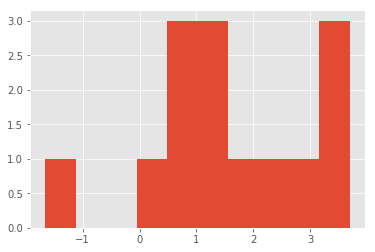

In [43]:
plt.hist(ClassII_rep_mgm3['log_min_toxval_mgm3_adj'])

In [44]:
print(10**(np.percentile(ClassII_rep_mgm3['log_min_toxval_mgm3_adj'],5)))

0.41654650829889445


## Neither Cramer class fits a normal distribution
## Comparing the Class I and Class III distributions

In [39]:
from scipy.stats import ks_2samp

In [40]:
alpha = 0.05
res = ks_2samp(ClassI_rep_mgm3['log_min_toxval_mgm3_adj'], ClassIII_rep_mgm3['log_min_toxval_mgm3_adj'])
if res[1] < alpha:
    print('dists are different')

dists are different


In [56]:
figures_dir = '/home/grace/Documents/python/ttc_inhalation/reports/figures/'

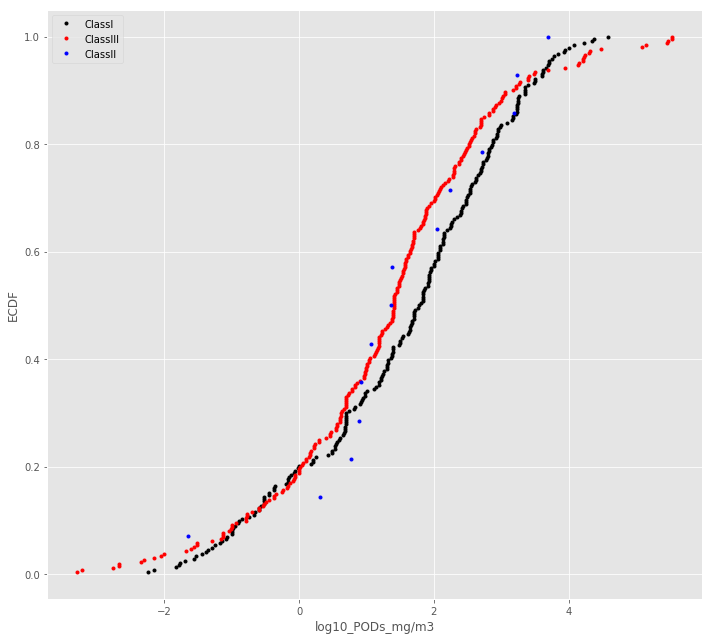

In [57]:
ClassI_logPODs = ClassI_rep_mgm3['log_min_toxval_mgm3_adj']
x_c1, y_c1 = ecdf(ClassI_logPODs)
ClassIII_logPODs = ClassIII_rep_mgm3['log_min_toxval_mgm3_adj']
x_c3, y_c3 = ecdf(ClassIII_logPODs)
ClassII_logPODs = ClassII_rep_mgm3['log_min_toxval_mgm3_adj']
x_c2, y_c2 = ecdf(ClassII_logPODs)


plt.figure(figsize = (10,9))
plt.plot(x_c1, y_c1 , marker = '.', linestyle = 'none', color = 'black', label = 'ClassI')
plt.plot(x_c3, y_c3 , marker = '.', linestyle = 'none', color = 'r', label = 'ClassIII')
plt.plot(x_c2, y_c2 , marker = '.', linestyle = 'none', color = 'b',label = 'ClassII')
plt.xlabel('log10_PODs_mg/m3')
plt.ylabel('ECDF')
plt.legend()

plt.tight_layout()
plt.savefig(figures_dir+'ECDF_Cramer_classes.png', dpi = 300)

In [58]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [59]:
from scipy.stats import norm

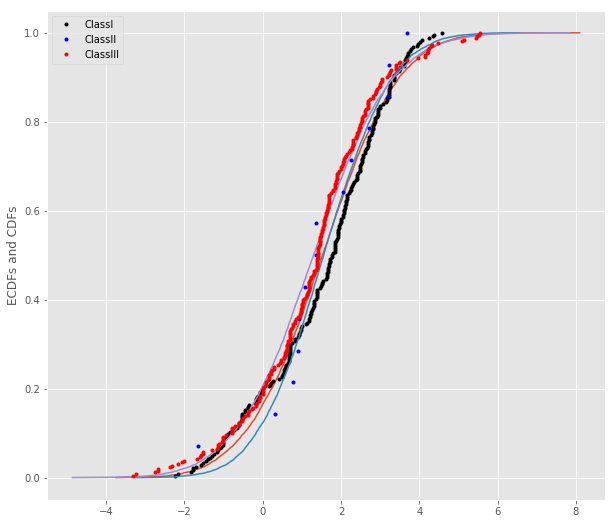

In [63]:
plt.figure(figsize = (10,9))

mean1 = np.mean(ClassI_logPODs)
std1 = np.std(ClassI_logPODs)
samples1 = np.random.normal(mean1, std1, size = 10000)

mean2 = np.mean(ClassII_logPODs)
std2 = np.std(ClassII_logPODs)
samples2 = np.random.normal(mean2, std2, size = 10000)

mean3 = np.mean(ClassIII_logPODs)
std3 = np.std(ClassIII_logPODs)
samples3 = np.random.normal(mean3, std3, size = 10000)


x1,y1 = ecdf(ClassI_logPODs)
xt1, yt1 = ecdf(samples1)


x2,y2 = ecdf(ClassII_logPODs)
xt2, yt2 = ecdf(samples2)

x3,y3 = ecdf(ClassIII_logPODs)
xt3, yt3 = ecdf(samples3)


plt.plot(xt1,yt1)
plt.plot(x1,y1,marker = '.', linestyle = 'None', label = 'ClassI', color = 'black')


plt.plot(xt2,yt2)
plt.plot(x2,y2,marker = '.', linestyle = 'None', label = 'ClassII', color = 'blue')



plt.plot(xt3,yt3)
plt.plot(x3,y3,marker = '.', linestyle = 'None', label = 'ClassIII', color = 'red')


plt.ylabel('ECDFs and CDFs')

plt.legend()

plt.savefig(figures_dir+'Fitted and Empircal CDFs.png', dpi = 300)

In [79]:
print(ClassI_rep_ppm.shape)
print(ClassII_rep_ppm.shape)
print(ClassIII_rep_ppm.shape)


(244, 3)
(14, 3)
(261, 3)


In [80]:
ClassIII_rep_ppm.head()

,Unnamed: 0,DTXSID,min_toxval_ppm_adj
0,0,DTXSID0020315,0.005000
1,1,DTXSID0020446,0.072010
2,2,DTXSID0021096,0.950686
3,3,DTXSID0021381,102.000000
4,4,DTXSID0021383,4.657972


In [82]:
ClassI_rep_ppm['log_min_toxval_ppm_adj'] = np.log10(ClassI_rep_ppm['min_toxval_ppm_adj'])
ClassII_rep_ppm['log_min_toxval_ppm_adj'] = np.log10(ClassII_rep_ppm['min_toxval_ppm_adj'])
ClassIII_rep_ppm['log_min_toxval_ppm_adj'] = np.log10(ClassIII_rep_ppm['min_toxval_ppm_adj'])

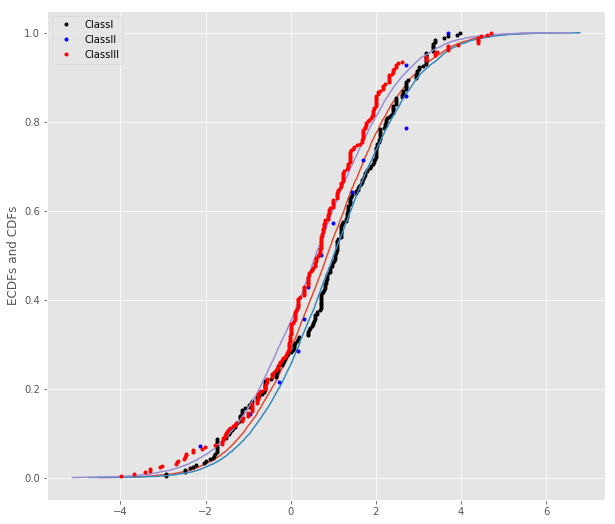

In [83]:
plt.figure(figsize = (10,9))

mean1 = np.mean(ClassI_rep_ppm['log_min_toxval_ppm_adj'])
std1 = np.std(ClassI_rep_ppm['log_min_toxval_ppm_adj'])
samples1 = np.random.normal(mean1, std1, size = 10000)

mean2 = np.mean(ClassII_rep_ppm['log_min_toxval_ppm_adj'])
std2 = np.std(ClassII_rep_ppm['log_min_toxval_ppm_adj'])
samples2 = np.random.normal(mean2, std2, size = 10000)

mean3 = np.mean(ClassIII_rep_ppm['log_min_toxval_ppm_adj'])
std3 = np.std(ClassIII_rep_ppm['log_min_toxval_ppm_adj'])
samples3 = np.random.normal(mean3, std3, size = 10000)


x1,y1 = ecdf(ClassI_rep_ppm['log_min_toxval_ppm_adj'])
xt1, yt1 = ecdf(samples1)


x2,y2 = ecdf(ClassII_rep_ppm['log_min_toxval_ppm_adj'])
xt2, yt2 = ecdf(samples2)

x3,y3 = ecdf(ClassIII_rep_ppm['log_min_toxval_ppm_adj'])
xt3, yt3 = ecdf(samples3)


plt.plot(xt1,yt1)
plt.plot(x1,y1,marker = '.', linestyle = 'None', label = 'ClassI', color = 'black')


plt.plot(xt2,yt2)
plt.plot(x2,y2,marker = '.', linestyle = 'None', label = 'ClassII', color = 'blue')



plt.plot(xt3,yt3)
plt.plot(x3,y3,marker = '.', linestyle = 'None', label = 'ClassIII', color = 'red')


plt.ylabel('ECDFs and CDFs')

plt.legend()

plt.savefig(figures_dir+'Fitted and Empircal CDFs_ppm.png', dpi = 300)

### Calculating TTC values

### Threshold = 5th percentile NOEC x dexp/10X2.5)

In [70]:
pct2 = 10**(np.percentile(ClassII_rep_mgm3['log_min_toxval_mgm3_adj'],5))
pct3 = 10**(np.percentile(ClassIII_rep_mgm3['log_min_toxval_mgm3_adj'],5))
pct1 = 10**(np.percentile(ClassI_rep_mgm3['log_min_toxval_mgm3_adj'],5))

In [86]:
print(pct1)
print(pct2)
print(pct3)

0.05789992361138339
0.41654650829889445
0.029999999999999995


In [71]:
d = ((6/24)*(5/7))
bw = 60
V = 20

In [85]:
TTC1_1 = (pct1*d)/(10*2.5)
TTC1_2 = (pct2*d)/(10*2.5)
TTC1_3 = (pct3*d)/(10*2.5)
print(TTC1_1)
print(TTC1_2)
print(TTC1_3)

0.00041357088293845275
0.0029753322021349605
0.00021428571428571425


In [87]:
TTC1 = pct1*d*(V/bw)*1000
TTC2 = pct2*d*(V/bw)*1000
TTC3 = pct3*d*(V/bw)*1000

In [88]:
print(TTC1)
print(TTC2)
print(TTC3)

3.446424024487106
24.794435017791333
1.7857142857142854


In [89]:
TTC_p1 = (TTC1*bw)/(10*2.5)
TTC_p2 = (TTC2*bw)/(10*2.5)
TTC_p3 = (TTC3*bw)/(10*2.5)

In [90]:
print(TTC_p1)
print(TTC_p2)
print(TTC_p3)



8.271417658769055
59.5066440426992
4.285714285714285


### Comparison to Carthew et al

In [110]:
carthew_1 = 170

In [104]:
(carthew_1 * 24*7*bw) / (6*5*V)

16464.0

In [105]:
(16464*d)/(19*2.5)

61.89473684210526

In [111]:
a =(carthew_1*10*2.5)/bw

In [112]:
b = d*(V/bw)*1000

In [113]:
c = a/b

In [114]:
(c*d)/(10*2.5)

0.0085